# Web Scrapping and Analysis of Soccer Statistics

##### The program collects the Champions League 2020/2021 team statistics from the website<br> and performs analysis to learn about the factors driving team's chances to win   

#### The initial page we start with - https://www.uefa.com/uefachampionsleague/season=2021/statistics/round=2001252/clubs/index.html

##    

## Web Scraping


##### In the first part the official UEFA website link is used to extract data pertaining to the Champions League soccer tournament. Web Scraping methods are used to gather statistics on the teams in the tournament.

### Libraries

In [22]:
# Import required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Functions

In [23]:
# Takes the link to team statistics as an argument and
# returns a dictionary containing team names and statistics
def get_categorical_club_stats(link):

    page=requests.get(link)
    soup=BeautifulSoup(page.content, 'html.parser')
    
    stats_headers=soup.find('thead').find('tr') # Locate the element containing the header information
    
    all_clubs_stats=soup.find('tbody').find_all('tr') # Locate the table containing team statistics
    
    headers_list=[]
    
    for headers in stats_headers: #Store the headers' names in the headers' list.
        headers_list.append(headers.get_text())
        
    for club_data in all_clubs_stats:
        
        club_name=club_data.find('a').get_text() #get the clubs' names
        
        categorical_stats=club_data.find_all('td')  # Locate all the team-specific statistics
       
        # Initialize the count variable to be used for reading
        # data from multiple tables into the result dictionary
        i=1 
        for header in headers_list: #headers_list which is taken from stats_headers
            
            # All the tables across different pages have team names as in the first column
            # We store the team name only once and, therefore, we skip such columns
            if header !='Team': 
                
                # Check if the club exists in the result dictionary
                if club_name not in clubs_dict:
                    
                    # If not, add the entry to the result dictionary as follow:
                    # - key is the club name (e.g. "Bayern")
                    # - value for the key is another dictionary
                    # - the value dictionary has the column name as key and column statistics as value (e.g. "'Wins' : '3'")
                    
                    clubs_dict[club_name]={header:categorical_stats[i].get_text()}
                    i+=1
                
                else:
                    
                    # If the club has already been added to the dictionary, update the dictionary in the same way as above
                    clubs_dict[club_name].update({header:categorical_stats[i].get_text()})
                    i+=1
    
    # Return the dictionary containing all the clubs names and statistics
    return (clubs_dict)

In [24]:
# Takes the link to the wepbage as an argument and returns
# the list of links to the pages containing team statistics
def get_table_header_links(link):

    # Store the link information
    page = requests.get(link)

    # Parse the link information
    soup = BeautifulSoup(page.content, 'html.parser')

    # Locate the class containing the header information
    table_headers = soup.find(class_='nav-tabs')

    # Initiate an empty list to store the header links in
    table_headers_links = []

    # Loop through all the elements in the class
    for header in table_headers:

        # Store the header name
        header_name = header.get('id')

        # The link containing the overview of team statistics differs from the other headers links
        # Check if the loop is at the "overview" header and apropriatelly append the link to the list in either case
        if header_name == 'overview':
            table_headers_links.append('')
        else:
            table_headers_links.append('/kind=' + header_name)

    # Return the list containing all the links
    return(table_headers_links)

In [25]:
# Takes the list of links containing team statistics as an input
# For each link it the list, it calls a function to read in team statistics
def get_all_club_stats(headers_list):  #we get these links from the second formula

    # Loop through the links in the provided list
    for header_link in headers_list:

        # Store the link appropriately
        link = 'https://www.uefa.com/uefachampionsleague/season=2021/statistics/round=2001252/clubs' + \
            header_link + '/index.html'

        # Call the function to extract team statistics from the link passed as an argument
        get_categorical_club_stats(link) #for each link provided, it will return the dictionary.

### Main Program to Collect Team Statistics

In [26]:
clubs_dict={}  #We make clubs_dict as a golabal variable as we will need it to create the DataFrame. (It wouldn't work if it was local variable)

# The link to the champions league website containing team statistics
cl_data_link = 'https://www.uefa.com/uefachampionsleague/season=2021/statistics/round=2001252/clubs/index.html'

# Store the links to the pages containing team statistics
table_headers_links = get_table_header_links(cl_data_link)

# Retrieve statistics for all the teams
get_all_club_stats(table_headers_links)

# Store all teams statistics in a pandas DataFrame
df_teams_stats = pd.DataFrame(clubs_dict).transpose()
pd.set_option('display.max_columns', None) #No maximum of columns, show all. 

df_teams_stats

,Matches played,Wins,Draws,Losses,Total goals,Average scored,Total goals against,Average conceded,Goal difference,Left foot,Right foot,Header,Other,Own goals (for),Inside area,Outside area,Penalties,Total attempts,Average per game,Attempts on target,Attempts off target,Attempts blocked,Attempts against woodwork,PA,PC,PC %,Average ball possession (%),Average ball possession (time),Total corners for,Average corners for,Total corners against,Average corners against,Crosses attempted,Crosses completed,Fouls committed,Fouls suffered,Yellow cards,Red cards
Bayern,6,5,1,0,18,3,5,0.83,13,3,9,5,0,1,14,3,2,95,15.83,33,35,27,3,3825,3281,86%,61%,37 m,29,4.83,31,5.17,117,24,76,66,11,1
Barcelona,6,5,0,1,16,2.67,5,0.83,11,4,10,1,1,0,15,1,5,108,18,48,38,22,4,4696,4276,91%,57%,37 m,30,5,17,2.83,66,13,62,67,9,1
Mönchengladbach,6,2,2,2,16,2.67,9,1.5,7,4,9,2,0,1,13,2,2,66,11,28,25,13,1,2946,2466,84%,44%,27 m,17,2.83,30,5,77,22,89,61,12,0
Man. United,6,3,0,3,15,2.5,10,1.67,5,2,11,1,0,1,13,1,4,84,14,36,24,24,2,3091,2590,84%,50%,28 m,34,5.67,28,4.67,113,28,82,74,13,1
Juventus,6,5,0,1,14,2.33,4,0.67,10,4,6,3,0,1,12,1,2,80,13.33,31,30,19,2,3694,3262,88%,52%,33 m,22,3.67,24,4,87,29,83,69,14,1
Chelsea,6,4,2,0,14,2.33,2,0.33,12,4,8,2,0,0,13,0,5,72,12,33,23,16,1,3580,3036,85%,54%,31 m,24,4,30,5,81,17,79,54,12,0
Man. City,6,5,1,0,13,2.17,1,0.17,12,2,10,0,0,1,10,2,1,93,15.5,40,31,22,1,4191,3683,88%,59%,38 m,37,6.17,7,1.17,120,26,63,40,10,0
Paris,6,4,0,2,13,2.17,6,1,7,3,8,1,0,1,10,2,2,81,13.5,29,30,22,3,3331,2867,86%,54%,32 m,31,5.17,33,5.5,94,15,64,95,17,2
Dortmund,6,4,1,1,12,2,5,0.83,7,8,4,0,0,0,9,3,1,87,14.5,37,32,18,1,4261,3732,88%,56%,37 m,35,5.83,23,3.83,91,18,54,51,1,0
Leipzig,6,4,0,2,11,1.83,12,2,-1,5,5,0,0,0,9,2,1,79,13.17,29,29,21,2,3095,2502,81%,51%,29 m,28,4.67,23,3.83,111,34,111,79,16,0


## Data Analysis

##### In the second part the extracted data is analyzed to identify trends and observe insights. Components for all teams in the Champions League tournament are used along with all their results and other statistics. Data is being analyzed in order to examine whether there are any factors that contribute more towards teams winning. The focus is on average goals scored, being in the inside area and scoring with the right foot.

In [27]:
# Examine a few rows
df_teams_stats.head()

,Matches played,Wins,Draws,Losses,Total goals,Average scored,Total goals against,Average conceded,Goal difference,Left foot,Right foot,Header,Other,Own goals (for),Inside area,Outside area,Penalties,Total attempts,Average per game,Attempts on target,Attempts off target,Attempts blocked,Attempts against woodwork,PA,PC,PC %,Average ball possession (%),Average ball possession (time),Total corners for,Average corners for,Total corners against,Average corners against,Crosses attempted,Crosses completed,Fouls committed,Fouls suffered,Yellow cards,Red cards
Bayern,6,5,1,0,18,3,5,0.83,13,3,9,5,0,1,14,3,2,95,15.83,33,35,27,3,3825,3281,86%,61%,37 m,29,4.83,31,5.17,117,24,76,66,11,1
Barcelona,6,5,0,1,16,2.67,5,0.83,11,4,10,1,1,0,15,1,5,108,18,48,38,22,4,4696,4276,91%,57%,37 m,30,5,17,2.83,66,13,62,67,9,1
Mönchengladbach,6,2,2,2,16,2.67,9,1.5,7,4,9,2,0,1,13,2,2,66,11,28,25,13,1,2946,2466,84%,44%,27 m,17,2.83,30,5,77,22,89,61,12,0
Man. United,6,3,0,3,15,2.5,10,1.67,5,2,11,1,0,1,13,1,4,84,14,36,24,24,2,3091,2590,84%,50%,28 m,34,5.67,28,4.67,113,28,82,74,13,1
Juventus,6,5,0,1,14,2.33,4,0.67,10,4,6,3,0,1,12,1,2,80,13.33,31,30,19,2,3694,3262,88%,52%,33 m,22,3.67,24,4,87,29,83,69,14,1


In [28]:
# Examine the data types
df_teams_stats.dtypes
#We then see that we need to transform them into either float or int types.

Matches played                    object
Wins                              object
Draws                             object
Losses                            object
Total goals                       object
Average scored                    object
Total goals against               object
Average conceded                  object
Goal difference                   object
Left foot                         object
Right foot                        object
Header                            object
Other                             object
Own goals (for)                   object
Inside area                       object
Outside area                      object
Penalties                         object
Total attempts                    object
Average per game                  object
Attempts on target                object
Attempts off target               object
Attempts blocked                  object
Attempts against woodwork         object
PA                                object
PC              

In [29]:
# All the values in the DataFrame are of string type even though they are all numeric values
# Additionally, columns 'PC %', 'Average ball possession (%)', and 'Average ball possession (time)' 
# have formatting as part of their values
# We can remove the formatting from values in the listed columns as the formatting is specified in the column names
df_teams_stats['PC %'] = df_teams_stats['PC %'].str.replace('%', '')
df_teams_stats['Average ball possession (%)'] = df_teams_stats['Average ball possession (%)'].str.replace('%', '')
df_teams_stats['Average ball possession (time)'] = df_teams_stats['Average ball possession (time)'].str.replace(' m', '')

In [30]:
# Confirm we have successfully removed the formatting from the values
df_teams_stats[['Average ball possession (%)', 'Average ball possession (time)', 'PC %']].head()

,Average ball possession (%),Average ball possession (time),PC %
Bayern,61,37,86
Barcelona,57,37,91
Mönchengladbach,44,27,84
Man. United,50,28,84
Juventus,52,33,88


In [31]:
# Now we can convert all the columns types to numeric
df_teams_stats = df_teams_stats.astype('float64')

In [32]:
# Confirm all the columns are type 'float64'
df_teams_stats.dtypes

Matches played                    float64
Wins                              float64
Draws                             float64
Losses                            float64
Total goals                       float64
Average scored                    float64
Total goals against               float64
Average conceded                  float64
Goal difference                   float64
Left foot                         float64
Right foot                        float64
Header                            float64
Other                             float64
Own goals (for)                   float64
Inside area                       float64
Outside area                      float64
Penalties                         float64
Total attempts                    float64
Average per game                  float64
Attempts on target                float64
Attempts off target               float64
Attempts blocked                  float64
Attempts against woodwork         float64
PA                                

In [33]:
total_goals_scored=df_teams_stats['Total goals'].sum()
print('total goals scored across the competition up to date is: ', total_goals_scored)

total goals scored across the competition up to date is:  289.0


In [34]:
less_scoring_teams=df_teams_stats[['Total goals','Wins', 'Losses']].sort_values('Total goals', ascending=True).head()
less_scoring_teams
#Printed are the top 5 teams that scored the less in the competition.
#We can already see a correlation between the lack of goals and the lack of wins (between 4 and 5 losses out of 6 games)

,Total goals,Wins,Losses
Marseille,2.0,1.0,5.0
Olympiacos,2.0,1.0,5.0
Rennes,3.0,0.0,5.0
Zenit,4.0,0.0,5.0
Midtjylland,4.0,0.0,4.0


In [35]:
most_scoring_teams=df_teams_stats[['Total goals','Wins','Losses']].sort_values('Total goals', ascending=False).head()
most_scoring_teams
#Among the top scoring teams we see a direct difference than with the less scoring teams. Indeed, 4 out of the top 5 teams
#have a total number of wins between 3 and 5, opposed to 0 and 1 from the previous analysis. 

,Total goals,Wins,Losses
Bayern,18.0,5.0,0.0
Barcelona,16.0,5.0,1.0
Mönchengladbach,16.0,2.0,2.0
Man. United,15.0,3.0,3.0
Juventus,14.0,5.0,1.0


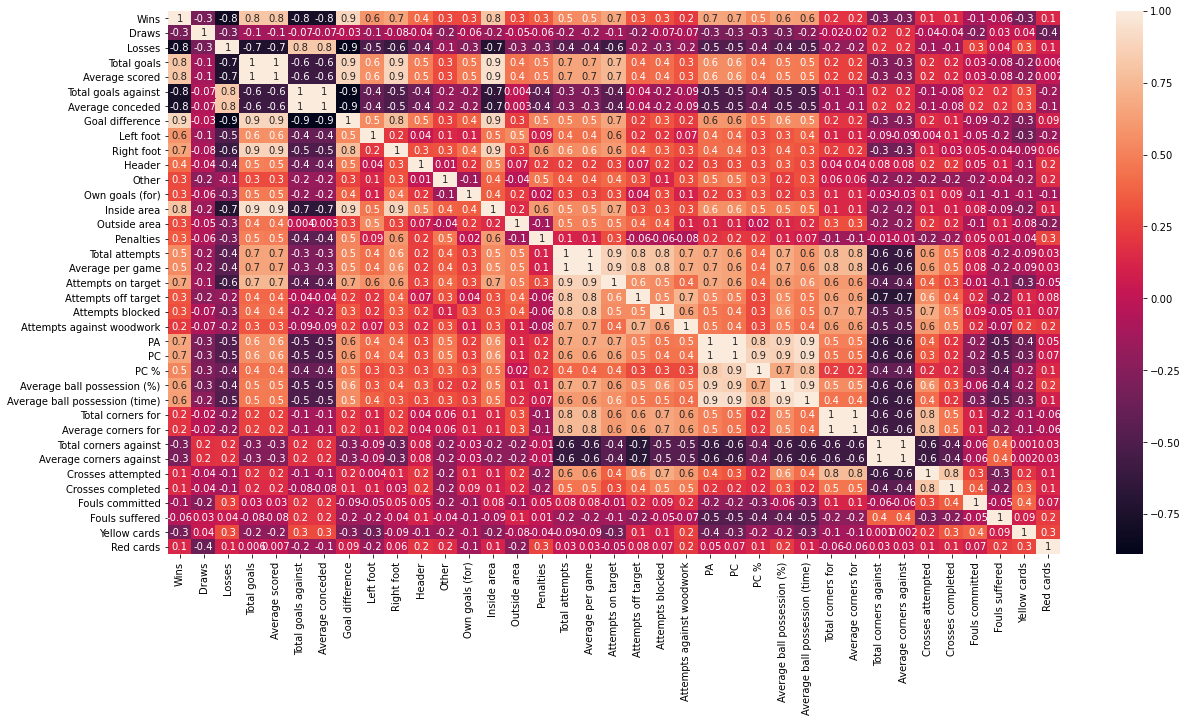

In [36]:
# We look at the correlation matrix to see which variables impact the outcome of the games the most
df_corr_matrix = df_teams_stats.corr().dropna(how='all').dropna(axis='columns')
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_corr_matrix, annot=True, fmt='.1g') 

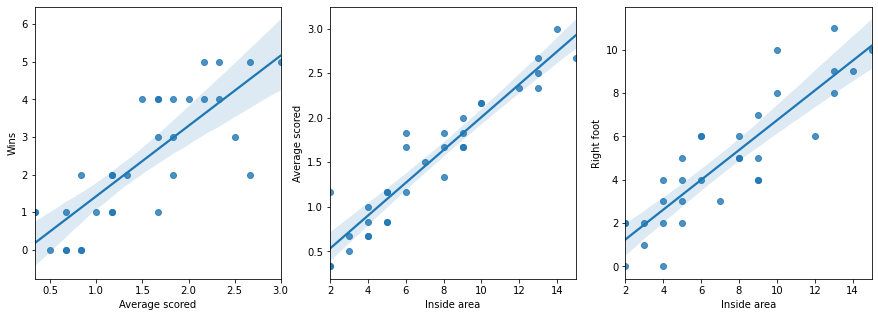

In [37]:
# It appears that teams who win more often score more goals, on average.
# Furthermore, teams who get into the inside area more often tend to score more goals, on average.
# Interestingly, most of the goals scored from the inside area were scored with a right foot.
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.regplot(x='Average scored', y='Wins', data=df_teams_stats, ax=axs[0])
sns.regplot(x='Inside area', y='Average scored', data=df_teams_stats, ax=axs[1])
sns.regplot(x='Inside area',y='Right foot', data=df_teams_stats, ax=axs[2])

In [38]:
#In the correlation matrix we see that the relationship between Wins and Average scored is of 0.8, so by fitting a linear
#model with wins as the dependant variable we can see to what extent the Average Goal Scored affect the probability of a team
#winning.
wins_per_goals=sm.OLS(df_teams_stats['Wins'], df_teams_stats['Average scored']).fit()
print(wins_per_goals.summary())
#The R^2 is of 88% which proves that the more goals you're capable of scoring, the higher the chances of winning.

                                 OLS Regression Results                                
Dep. Variable:                   Wins   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              231.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    6.28e-16
Time:                        19:51:08   Log-Likelihood:                         -45.350
No. Observations:                  32   AIC:                                      92.70
Df Residuals:                      31   BIC:                                      94.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [39]:
# Considering the linear relationship between 'Wins' variable and 'Average scored', 'Inside area', and 'Right foot'
# variables, we can fit a linear regression model

result = sm.OLS(df_teams_stats['Wins'], df_teams_stats[['Average scored', 'Inside area', 'Right foot']]).fit()
result.summary()
# Adj. R-squared of 0.885 indicate that teams who score goals with a right foot from the inside area are more likely to win

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wins   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              83.00
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    2.44e-14
Time:                        19:51:08   Log-Likelihood:                         -43.365
No. Observations:                  32   AIC:                                      92.73
Df Residuals:                      29   BIC:                                      97.13
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Average scored     1.1494      0.747      1.538      0.135      -0.379       2.678
Inside area        0.2376      0.151      1.578      0.125      -0.070       0.546
Right foot        -0.2023      0.131     -1.541      0.134      -0.471       0.066
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.033
Skew:                          -0.074   Prob(JB):                        0.983
Kurtosis:                       3.055   Cond. No.                         43.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# To confirm the hypothesis, we narrow the focus down to the teams who won more than half of their games to better understand their style
best_teams_stats = df_teams_stats[df_teams_stats['Wins']>3]
best_teams_stats

,Matches played,Wins,Draws,Losses,Total goals,Average scored,Total goals against,Average conceded,Goal difference,Left foot,Right foot,Header,Other,Own goals (for),Inside area,Outside area,Penalties,Total attempts,Average per game,Attempts on target,Attempts off target,Attempts blocked,Attempts against woodwork,PA,PC,PC %,Average ball possession (%),Average ball possession (time),Total corners for,Average corners for,Total corners against,Average corners against,Crosses attempted,Crosses completed,Fouls committed,Fouls suffered,Yellow cards,Red cards
Bayern,6.0,5.0,1.0,0.0,18.0,3.00,5.0,0.83,13.0,3.0,9.0,5.0,0.0,1.0,14.0,3.0,2.0,95.0,15.83,33.0,35.0,27.0,3.0,3825.0,3281.0,86.0,61.0,37.0,29.0,4.83,31.0,5.17,117.0,24.0,76.0,66.0,11.0,1.0
Barcelona,6.0,5.0,0.0,1.0,16.0,2.67,5.0,0.83,11.0,4.0,10.0,1.0,1.0,0.0,15.0,1.0,5.0,108.0,18.00,48.0,38.0,22.0,4.0,4696.0,4276.0,91.0,57.0,37.0,30.0,5.00,17.0,2.83,66.0,13.0,62.0,67.0,9.0,1.0
Juventus,6.0,5.0,0.0,1.0,14.0,2.33,4.0,0.67,10.0,4.0,6.0,3.0,0.0,1.0,12.0,1.0,2.0,80.0,13.33,31.0,30.0,19.0,2.0,3694.0,3262.0,88.0,52.0,33.0,22.0,3.67,24.0,4.00,87.0,29.0,83.0,69.0,14.0,1.0
Chelsea,6.0,4.0,2.0,0.0,14.0,2.33,2.0,0.33,12.0,4.0,8.0,2.0,0.0,0.0,13.0,0.0,5.0,72.0,12.00,33.0,23.0,16.0,1.0,3580.0,3036.0,85.0,54.0,31.0,24.0,4.00,30.0,5.00,81.0,17.0,79.0,54.0,12.0,0.0
Man. City,6.0,5.0,1.0,0.0,13.0,2.17,1.0,0.17,12.0,2.0,10.0,0.0,0.0,1.0,10.0,2.0,1.0,93.0,15.50,40.0,31.0,22.0,1.0,4191.0,3683.0,88.0,59.0,38.0,37.0,6.17,7.0,1.17,120.0,26.0,63.0,40.0,10.0,0.0
Paris,6.0,4.0,0.0,2.0,13.0,2.17,6.0,1.00,7.0,3.0,8.0,1.0,0.0,1.0,10.0,2.0,2.0,81.0,13.50,29.0,30.0,22.0,3.0,3331.0,2867.0,86.0,54.0,32.0,31.0,5.17,33.0,5.50,94.0,15.0,64.0,95.0,17.0,2.0
Dortmund,6.0,4.0,1.0,1.0,12.0,2.00,5.0,0.83,7.0,8.0,4.0,0.0,0.0,0.0,9.0,3.0,1.0,87.0,14.50,37.0,32.0,18.0,1.0,4261.0,3732.0,88.0,56.0,37.0,35.0,5.83,23.0,3.83,91.0,18.0,54.0,51.0,1.0,0.0
Leipzig,6.0,4.0,0.0,2.0,11.0,1.83,12.0,2.00,-1.0,5.0,5.0,0.0,0.0,0.0,9.0,2.0,1.0,79.0,13.17,29.0,29.0,21.0,2.0,3095.0,2502.0,81.0,51.0,29.0,28.0,4.67,23.0,3.83,111.0,34.0,111.0,79.0,16.0,0.0
Porto,6.0,4.0,1.0,1.0,10.0,1.67,3.0,0.50,7.0,2.0,7.0,1.0,0.0,0.0,9.0,1.0,3.0,42.0,7.00,19.0,19.0,4.0,0.0,2248.0,1730.0,77.0,41.0,23.0,14.0,2.33,37.0,6.17,54.0,16.0,73.0,90.0,12.0,1.0
Liverpool,6.0,4.0,1.0,1.0,10.0,1.67,3.0,0.50,7.0,5.0,4.0,0.0,0.0,1.0,9.0,0.0,1.0,65.0,10.83,27.0,23.0,15.0,1.0,3429.0,2811.0,82.0,53.0,33.0,25.0,4.17,28.0,4.67,84.0,18.0,74.0,56.0,11.0,0.0


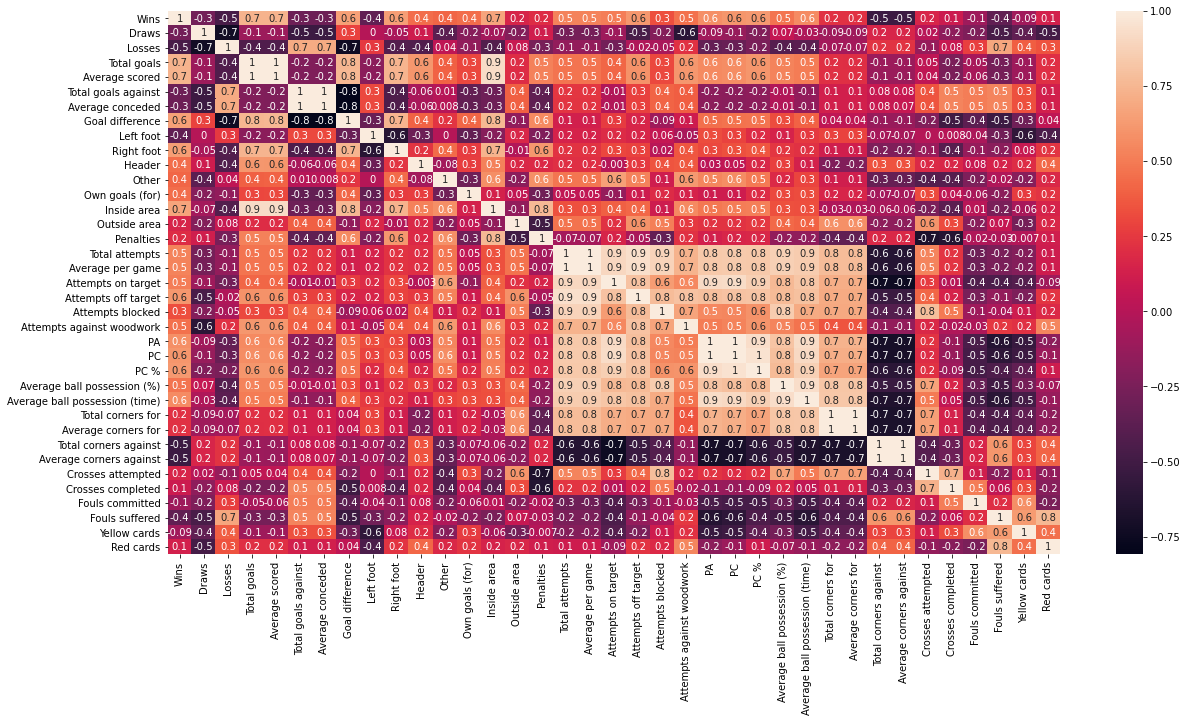

In [41]:
# Our hypothesis is confirmed by looking at the best teams' matrix correlation. 
# We look at the correlation matrix to see which variables impact the outcome of the best teams' games the most
df_corr_matrix = best_teams_stats.corr().dropna(how='all').dropna(axis='columns')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr_matrix, annot=True, fmt='.1g')
# There is an important correlation of 0.9 between the Average goal scored and the Inside Area which proves that the 
# best teams have great players capable of breaking the opponents' defenses by being able to bring the ball
# inside the opponents' surface, shoot and score. 
# Additionally, there is a negative correlaton between Average goal scored and Left Foot as the best team players
# manage to dribble their opponents efficiently and thus are able to shoot with their right foot. 

### Conclusion

##### After narrowing down the analysis to the teams that won more than half their games, it is observed that the more a team is in their opponent's inside area, the more likely it is to score and win the game. Additionally, it is observed that players tend to score more with their right foot when in the opponent's inside area. This happens when the attacking team manages to break the opponents' defenses which allows the attackers to get inside the area, and as there are no more players to mark them, they are able to shoot with their right foot (more players are right footed than left footed) which gives them a higher chance of scoring and therefore winning. 